# Skin Cancer Detection

**load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# machine learning and deep learning stack
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

**Load data**

In [2]:
train = pd.read_csv("Augmentation/train_df.csv")
test = pd.read_csv("Augmentation/test_df.csv")

In [3]:
train.shape, test.shape

((600, 59), (60, 60))

In [4]:
train

,index,background_father_BRAZIL,background_father_GERMANY,background_father_ITALY,background_father_NETHERLANDS,background_father_POLAND,background_father_POMERANIA,background_father_PORTUGAL,background_father_SPAIN,background_father_UNK,...,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,img_id
0,203,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,-0.409295,-0.793979,-0.839539,BCC,PAT_885_1687_823.png
1,590,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,0.145650,0.615530,0.600582,SEK,PAT_1408_1406_950.png
2,231,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,-0.409295,0.723954,0.760595,MEL,PAT_656_1246_483.png
3,233,0,0,0,0,0,1,0,0,0,...,1,1,1,1,1,-0.409295,1.916616,2.160713,MEL,PAT_719_1361_160.png
4,29,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.409295,-0.685556,-0.839539,ACK,PAT_492_1782_752.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,605,0,0,0,0,0,1,0,0,0,...,1,0,1,1,1,-0.409295,0.387461,0.650236,MEL,923645a9-2759-4946-8f7a-353c50f8b0c4.png
596,302,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,0.978066,-0.143436,-0.639522,NEV,PAT_665_1260_16.png
597,270,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.409295,0.398683,1.160629,MEL,PAT_45_66_822.png
598,551,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,-0.131822,-0.251860,-0.159482,SEK,PAT_1882_3718_982.png


In [5]:
train = train.sample(frac = 1).reset_index()

In [6]:
train

,level_0,index,background_father_BRAZIL,background_father_GERMANY,background_father_ITALY,background_father_NETHERLANDS,background_father_POLAND,background_father_POMERANIA,background_father_PORTUGAL,background_father_SPAIN,...,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,img_id
0,119,612,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-0.409295,1.078469,1.725821,MEL,bc6f5a06-0254-4ebd-ad32-f09a5c1d880b.png
1,43,123,0,0,0,0,0,1,0,0,...,1,1,0,1,0,-0.409295,-0.577132,-0.839539,BCC,PAT_729_1382_390.png
2,281,172,0,0,0,0,0,1,0,0,...,0,1,1,1,1,-0.409295,-0.468708,-0.439505,BCC,PAT_815_1534_411.png
3,432,492,0,1,0,0,0,0,0,0,...,0,1,0,1,0,-0.409295,0.832378,-0.239489,SEK,PAT_343_717_927.png
4,248,156,0,0,0,0,0,0,0,0,...,1,1,1,1,0,-0.409295,0.507107,1.160629,BCC,PAT_520_983_221.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11,330,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0.978066,0.615530,1.360646,NEV,PAT_958_1812_62.png
596,58,90,0,1,0,0,0,0,0,0,...,0,0,0,0,1,-0.409295,-0.577132,-0.639522,ACK,PAT_872_1708_841.png
597,421,577,0,0,0,0,0,1,0,0,...,0,0,1,1,1,0.145650,-0.425338,-0.519512,SEK,PAT_1653_2916_994.png
598,275,360,0,0,0,0,0,1,0,0,...,0,0,1,1,1,-0.409295,-0.685556,-0.839539,NEV,PAT_1136_517_92.png


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_0                        600 non-null    int64  
 1   index                          600 non-null    int64  
 2   background_father_BRAZIL       600 non-null    int64  
 3   background_father_GERMANY      600 non-null    int64  
 4   background_father_ITALY        600 non-null    int64  
 5   background_father_NETHERLANDS  600 non-null    int64  
 6   background_father_POLAND       600 non-null    int64  
 7   background_father_POMERANIA    600 non-null    int64  
 8   background_father_PORTUGAL     600 non-null    int64  
 9   background_father_SPAIN        600 non-null    int64  
 10  background_father_UNK          600 non-null    int64  
 11  background_mother_FRANCE       600 non-null    int64  
 12  background_mother_GERMANY      600 non-null    int

**features**

In [8]:
X_train = train.drop(['diagnostic','img_id', 'index', 'level_0'], axis=1).astype(float)

In [9]:
TOTAL_FEATURES = X_train.shape[1]
TOTAL_FEATURES

57

**Encode Target**

In [10]:
CLASSES = sorted(train['diagnostic'].unique())

In [11]:
CLASSES

['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [12]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(
    train['diagnostic'].values.reshape(-1, 1)
)
y_train = np.array(y_train.todense())

In [13]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [14]:
train['diagnostic']

0      MEL
1      BCC
2      BCC
3      SEK
4      BCC
      ... 
595    NEV
596    ACK
597    SEK
598    NEV
599    BCC
Name: diagnostic, Length: 600, dtype: object

In [15]:
def build_cnn():
    '''
    complies a model by stacking dense layers
    '''
    # initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # input layer
    model.add(keras.layers.Input(shape=(TOTAL_FEATURES,)))
    # hidden layer
    model.add(keras.layers.Dense(units=16, activation='elu'))
    # dropout 
    model.add(keras.layers.Dropout(rate=0.5))
    # output layer with softmax activation function
    model.add(keras.layers.Dense(len(CLASSES),activation='softmax'))
    return model

In [16]:
def complie_ann(ann):
    """
    """
    ann.compile(
        optimizer=keras.optimizers.Adam(lr=0.001),
        loss=keras.losses.categorical_crossentropy,
        metrics=[keras.metrics.categorical_accuracy]
    )
    return ann

### Model Training

**train model**

In [17]:
# instantiate model
model = build_cnn()
model = complie_ann(model)

In [18]:
# early stopping

stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=50
)

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1_000,
    batch_size=48,
    callbacks=[stop_early],
    validation_split=0.2
)

Epoch 1/1000
10/10 [==============================] - 2s 35ms/step - loss: 60.0307 - categorical_accuracy: 0.1604 - val_loss: 31.3207 - val_categorical_accuracy: 0.2417
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 54.4500 - categorical_accuracy: 0.1708 - val_loss: 27.6939 - val_categorical_accuracy: 0.2417
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 47.2531 - categorical_accuracy: 0.1875 - val_loss: 24.1382 - val_categorical_accuracy: 0.2167
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 45.4539 - categorical_accuracy: 0.1562 - val_loss: 21.2086 - val_categorical_accuracy: 0.2167
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 37.5971 - categorical_accuracy: 0.1646 - val_loss: 18.7465 - val_categorical_accuracy: 0.2167
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 35.3483 - categorical_accuracy: 0.1750 - val_loss: 16.7005 - val_categorical_accuracy

**training history: losses and epoch numbers**

In [20]:
# losses in the training history
losses = pd.DataFrame(model.history.history)
# training loss
loss = losses['loss'].values 
# validation loss
val_loss = losses['val_loss'].values

# epoch number
epoch = losses.index.values + np.ones_like(losses.index.values)

**plot training history**

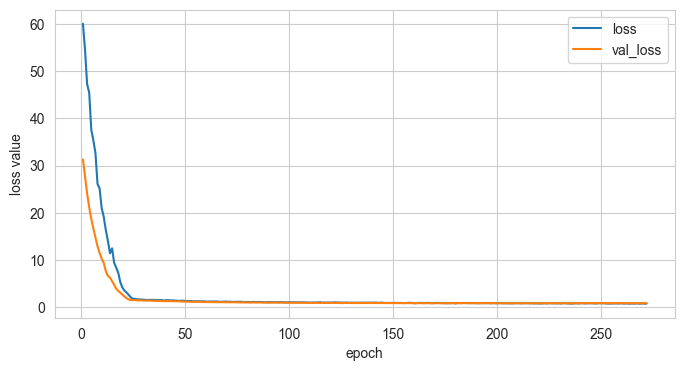

In [21]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,4),dpi=100)
plt.plot(epoch, loss, linewidth=1.5, label='loss')
plt.plot(epoch, val_loss, linewidth=1.5, label='val_loss')

plt.xlabel('epoch',fontsize=10)
plt.ylabel('loss value',fontsize=10)
plt.legend(loc=1,fontsize=10);

### Model Evaluation

**features and target**

In [22]:
X_test = test.drop(['diagnostic','img_id', 'patient'], axis=1).astype(float)

In [23]:
y_test = ohe.transform(
    test['diagnostic'].values.reshape(-1, 1)
)
y_test = np.array(y_test.todense())

In [24]:
def hard_prediction(model, X, y):
    """
    returns dataframe with class probabilities 
    and true class label 
    """
    # prediction dataframe along with true class
    pred = model.predict(X,verbose=0)
    pred = np.array(
        [pred[i]==pred[i].max() for i in range(len(pred))]
    ).astype(int)
    
    df_pred = pd.DataFrame(
        columns=CLASSES,
        data=pred
    )
    # convert vectorized classes into strings
    df_pred['class'] = \
    [''.join([i*j for (i,j) in zip(CLASSES,vector)]) for vector in y.astype(int)]
    
    return df_pred

In [25]:
hard_prediction(model, X_test, y_test)

,ACK,BCC,MEL,NEV,SCC,SEK,class
0,0,1,0,0,0,0,BCC
1,0,0,0,0,1,0,MEL
2,0,0,0,0,0,1,SEK
3,0,0,0,0,0,1,ACK
4,0,0,0,0,0,1,SEK
5,0,1,0,0,0,0,ACK
6,1,0,0,0,0,0,MEL
7,0,0,1,0,0,0,MEL
8,0,0,0,0,1,0,SCC
9,1,0,0,0,0,0,ACK


In [26]:
def accuracy_score(model,X,y):
    """
    This function spits out multi-class accuracy
    """
    grouped_df = hard_prediction(model, X, y).groupby('class').sum()
    
    grouped_df.sort_index(axis=1,inplace=True)
    
    accuracy_score = np.trace(grouped_df)/np.array(grouped_df).sum()
    accuracy_score = round(accuracy_score,6)
    
    return accuracy_score

In [27]:
accuracy_score(model, X_train, y_train)

0.77

In [28]:
accuracy_score(model, X_test, y_test)

0.666667